## Classify Cats and Dogs using Fine Tuning of Resnet

Install needed library

In [1]:
! pip install matplotlib==3.7.1 matplotlib-inline==0.1.7 matplotlib-venn==0.11.10
! pip install numpy==1.26.4
! pip install fastai==2.7.16 fastbook==0.0.29

In [2]:
from fastbook import *
from fastai.vision.all import *

import tkinter as tk
from tkinter import filedialog

In [3]:
dest = './content/DataML'
path = untar_data (URLs.PETS, data=dest)/'images' 
def is_cat(x): return x[0].isupper() 

dls = ImageDataLoaders.from_name_func(
    path=path, fnames=get_image_files(path),        
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [4]:
dls.valid.shuffle = True

In [5]:
model = cnn_learner(dls, resnet34, metrics=error_rate)
model.fine_tune(1)

/home/andre/miniconda3/envs/venv/lib/python3.12/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,0.172365,0.021951,0.010149,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.062093,0.014037,0.004736,00:27


test

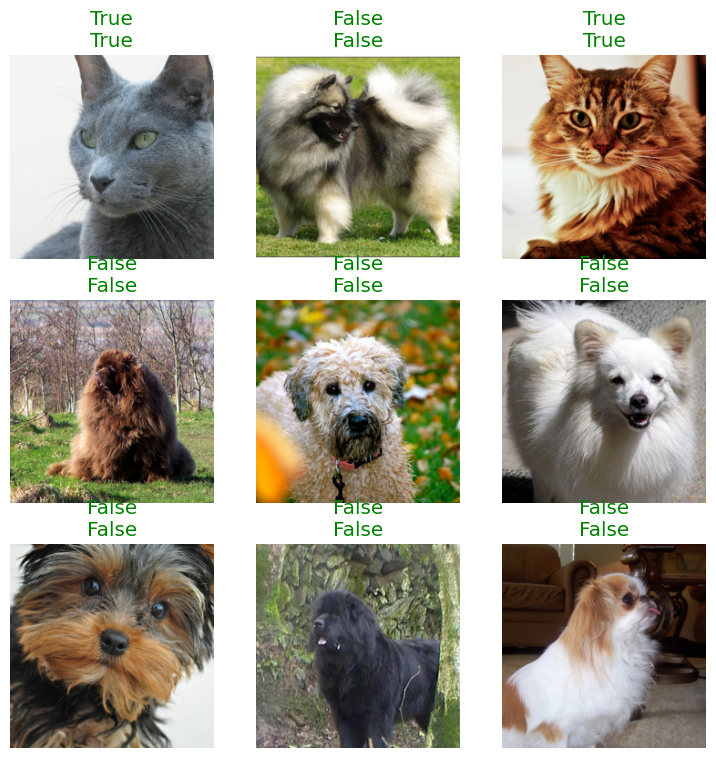

In [6]:
model.show_results()

validation step

In [7]:
img_directory = 'img'
image_files = [os.path.join(img_directory, f) for f in os.listdir(img_directory) if f.endswith(('.jpg', '.jpeg'))]
image_files

['img/dog4.jpg',
 'img/cat1.jpg',
 'img/cat3.jpg',
 'img/dog1.jpeg',
 'img/dog5.jpg',
 'img/dog2.jpg',
 'img/cat2.jpg',
 'img/dog3.jpg']

In [8]:
model.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [9]:
for file in image_files:
    img = PILImage.create(file)
    pred, _, _ = model.predict(img)
    
    if pred == 'True':
        print(f'File: {file}, Prediction: Cat')
    else:
        print(f'File: {file}, Prediction: Dog')


File: img/dog4.jpg, Prediction: Dog


File: img/cat1.jpg, Prediction: Cat


File: img/cat3.jpg, Prediction: Cat


File: img/dog1.jpeg, Prediction: Dog


File: img/dog5.jpg, Prediction: Dog


File: img/dog2.jpg, Prediction: Dog


File: img/cat2.jpg, Prediction: Cat


File: img/dog3.jpg, Prediction: Dog


In [10]:
def open_file_dialog():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    print(f"Selected file: {file_path}")
    return file_path

user_file = open_file_dialog()

Selected file: /home/andre/code/AI/DL/Classification_fastai/img/dog4.jpg


Prediction: Dog


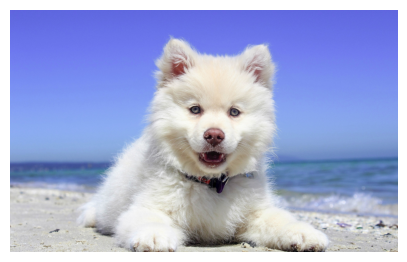

In [11]:
img = PILImage.create(user_file)
img.show()

pred, _, _ = model.predict(img)
    
if pred == 'True':
    print(f'Prediction: Cat')
else:
    print(f'Prediction: Dog')